In [47]:
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import normaltest
from statsmodels.stats.diagnostic import lilliefors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
mpg = sns.load_dataset("mpg")

In [4]:
pd.set_option('display.float_format',lambda x: '%.2f'%x)
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.00,398.00,398.00,392.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.47,2970.42,15.57,76.01
std,7.82,1.70,104.27,38.49,846.84,2.76,3.70
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00
25%,17.50,4.00,104.25,75.00,2223.75,13.83,73.00
50%,23.00,4.00,148.50,93.50,2803.50,15.50,76.00
75%,29.00,8.00,262.00,126.00,3608.00,17.18,79.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00


In [6]:
df = pd.read_csv('bestsellers with categories.csv')
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.70,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.60,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.70,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.70,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.80,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.90,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.70,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.70,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.70,14331,8,2018,Non Fiction


In [34]:
kstest(df['User Rating'],'norm')
# pvalue = 0

KstestResult(statistic=0.9995165758576162, pvalue=0.0, statistic_location=3.3, statistic_sign=-1)

In [35]:
if kstest(df['User Rating'],'norm')[1]>0.05:
    print('Normal Distribution')
else:
    print('Not Normal')

Not Normal


In [36]:
lilliefors(df['Reviews'])
# pvalue =  0.0009999999999998899

(0.1789514349053149, 0.0009999999999998899)

In [32]:
if lilliefors(df['Reviews'])[1]>0.05:
    print('Normal Distribution')
else:
    print('Not Normal')

Not Normal


In [40]:
shapiro(df['Price'])
# pvalue =  4.692572320007995e-30

ShapiroResult(statistic=0.7021759748458862, pvalue=4.692572320007995e-30)

In [29]:
if shapiro(df['Price'])[1]>0.05:
    print('Normal Distribution')
else:
    print('Not Normal')

Not Normal


In [46]:
normaltest(df['Year'])

NormaltestResult(statistic=415.62868087137224, pvalue=5.589573720646411e-91)

In [44]:
if normaltest(df['Year'])[1]>0.05:
    print('Normal Distribution')
else:
    print('Not Normal')

Not Normal


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [51]:
df.describe(include='all')

,Name,Author,User Rating,Reviews,Price,Year,Genre
count,550,550,550.00,550.00,550.00,550.00,550
unique,351,248,NaN,NaN,NaN,NaN,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,NaN,NaN,NaN,NaN,Non Fiction
freq,10,12,NaN,NaN,NaN,NaN,310
mean,NaN,NaN,4.62,11953.28,13.10,2014.00,NaN
std,NaN,NaN,0.23,11731.13,10.84,3.17,NaN
min,NaN,NaN,3.30,37.00,0.00,2009.00,NaN
25%,NaN,NaN,4.50,4058.00,7.00,2011.00,NaN
50%,NaN,NaN,4.70,8580.00,11.00,2014.00,NaN
75%,NaN,NaN,4.80,17253.25,16.00,2017.00,NaN


In [52]:
df.describe(include='object')

,Name,Author,Genre
count,550,550,550
unique,351,248,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction
freq,10,12,310


#### Graphical Method or Normal Distribution

c:\Users\Fiki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

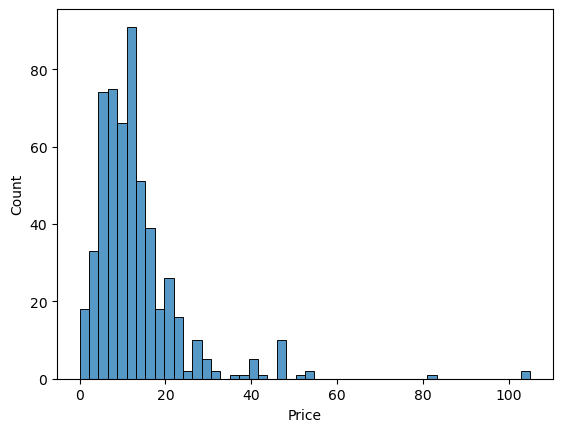

In [54]:
# df.hist()
sns.histplot(data=df, x='Price')

c:\Users\Fiki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

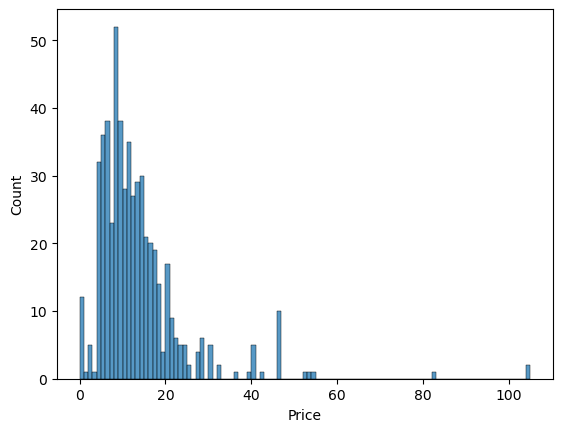

In [58]:
sns.histplot(data=df, x='Price', binwidth=1)

In [59]:
df['Price'].skew()
# distribution normal -> skew = 0
# right skew -> skew>0
# left skew -> skew<0
# -o.5 sampai 0.5 masih bisa dianggap  distribusi normal

3.685056537836339

In [60]:
df['Price'].kurtosis()
# distribusi normal --> kurtosis=3
# leptokurtik --> kurtosis > 3 (menjulang)
# platykurtik --> kurtosis < 3 (landai)


22.43352032785043

<Axes: xlabel='Price'>

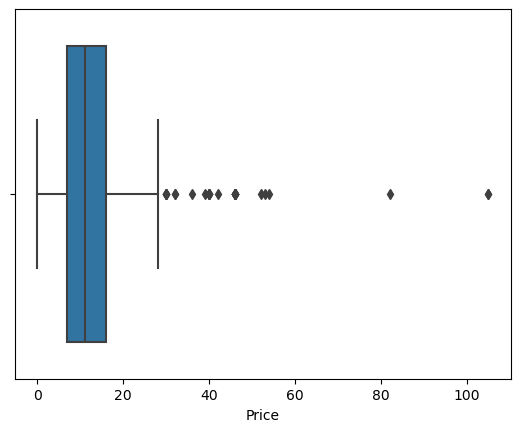

In [61]:
# plt.figure(figsize=(10,3))
sns.boxplot(data=df, x='Price')

In [66]:
# plt.figure(figsize=(10,3), x='Price')

In [65]:
df['Price'].describe()[['25%','50%','75%']]

25%    7.00
50%   11.00
75%   16.00
Name: Price, dtype: float64

In [67]:
q1, q3 = np.percentile(df['Price'], [25, 75])
iqr = q3-q1
iqr

9.0

In [70]:
normal = np.random.normal(loc=0,scale=1)


AttributeError: 'float' object has no attribute 'hist'